# Prophet
- `Prophet`은 비선형 추세가 연도별, 주별, 일별, 계절성과 그리고 휴일효과에 반영할 수 있는 시계열 모형이다
- 계절적 효과가 강하고 여러 시즌의 과거 데이터가 있는 시계열에서 가장 잘 작동한다
- 또한 누락된 데이터와 추세 변화에 강하며 일반적으로 이상 값을 잘 처리한다

## 설치

- https://ichi.pro/ko/jupyter-noteubug-eseo-sigyeyeol-yecheug-eul-wihan-fbprophet-prophet-seolchi-138430470814014
- Python 3.8버젼 가상환경 생성
- REQUIREMENTS 설치
<br><br>
* Import시 plotly오류 나면 > `pip install --upgrade plotly` 

## 모듈 Import

In [1]:
#!pip install pandas-datareader

  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Using cached charset_normalizer-2.0.8-py3-none-any.whl (39 kB)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from prophet import Prophet

## 예제

### 삼각함수 그래프
- 시계열 형태의 삼각함수 그래프 >> 이후 30일간의 데이터를 예측해보고 그래프로 나타내기

<AxesSubplot:>

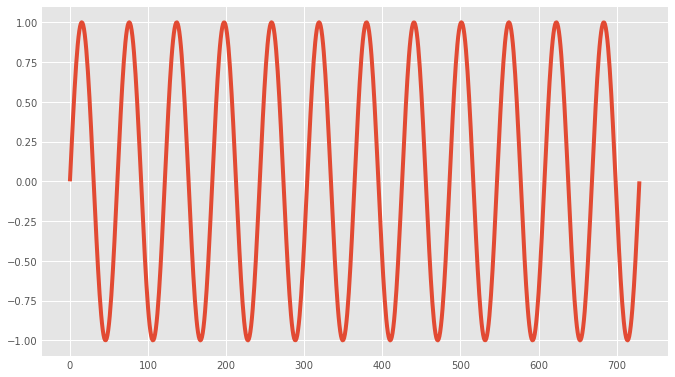

In [12]:
time = np.linspace(0, 1, 365 * 2)
result = np.sin(2 * np.pi * 12 * time)
ds = pd.date_range("2018-01-01", periods = 365 * 2, freq = 'D')
df = pd.DataFrame({'ds' : ds, 'y' : result})

df['y'].plot(figsize = (10, 6))

In [13]:
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


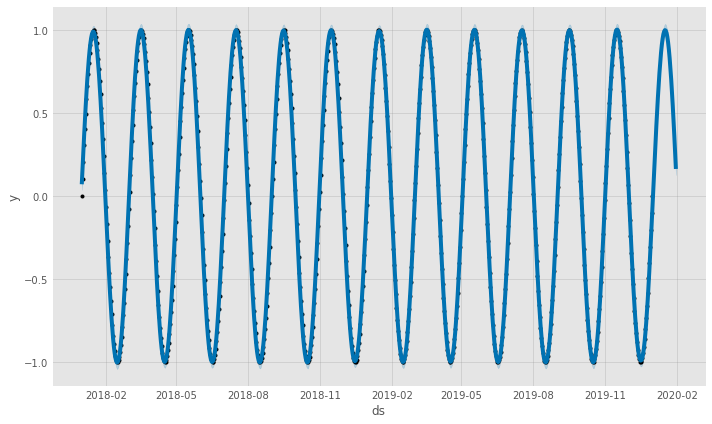

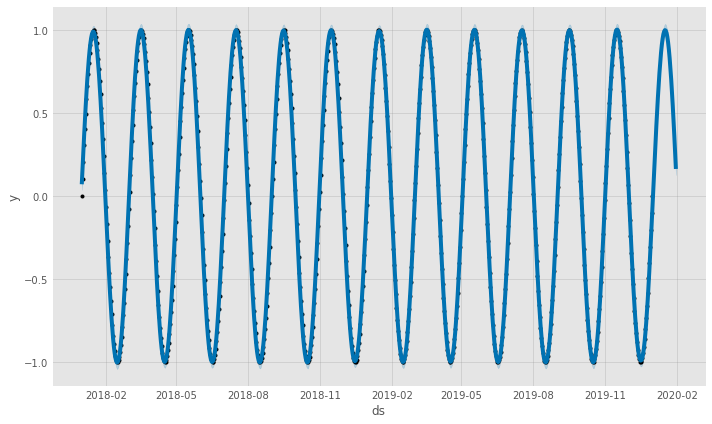

In [14]:
# 이후 30일간의 데이터를 예측해보고 그래프에 나타내보자

## 학습
m = Prophet(yearly_seasonality = True, daily_seasonality = True)
m.fit(df)

## 이후 30일간의 데이터 예측
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

m.plot(forecast)

### 삼각함수 그래프 + BIAS

<AxesSubplot:>

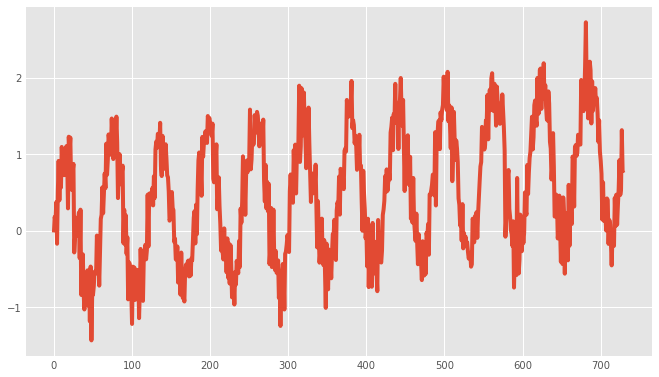

In [15]:
time = np.linspace(0, 1, 365 * 2)
result = np.sin(2 * np.pi * 12 * time) + time + np.random.randn(365 * 2) / 4
ds = pd.date_range("2018-01-01", periods = 365 * 2, freq = 'D')
df = pd.DataFrame({'ds' : ds, 'y' : result})

df['y'].plot(figsize = (10, 6))

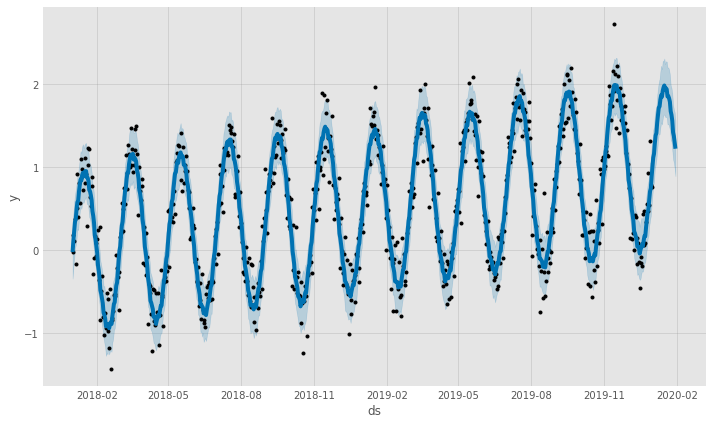

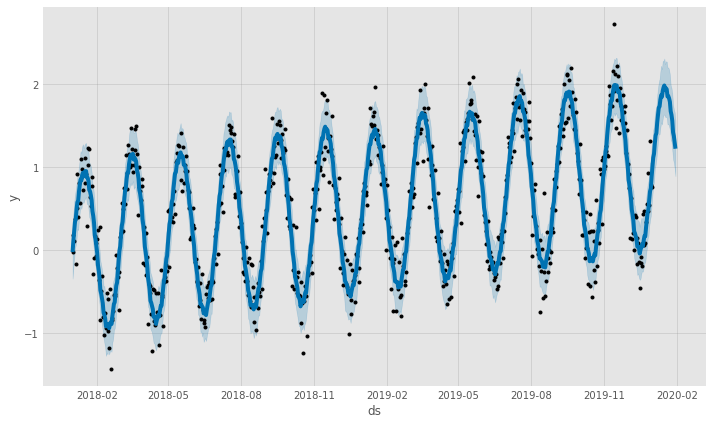

In [16]:
m = Prophet(yearly_seasonality = True, daily_seasonality = True)
m.fit(df)

future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

m.plot(forecast)

## 주가 데이터

### 주가데이터 가져오기

In [17]:
import pandas_datareader.data as web

In [18]:
start = '2018-01-01'
end = '2020-12-31'
ticker = 'LAC'
df = web.DataReader(name = ticker, data_source = 'yahoo', start = start, end = end)

df['ds'] = pd.to_datetime(df.index, format = '%Y-%m-%d')
df['y'] = df['Close']
df = df[['ds', 'y']]
df.head()

,ds,y
Date,,
2018-01-02,2018-01-02,9.14
2018-01-03,2018-01-03,8.91
2018-01-04,2018-01-04,8.92
2018-01-05,2018-01-05,9.72
2018-01-08,2018-01-08,10.02


### 시각화

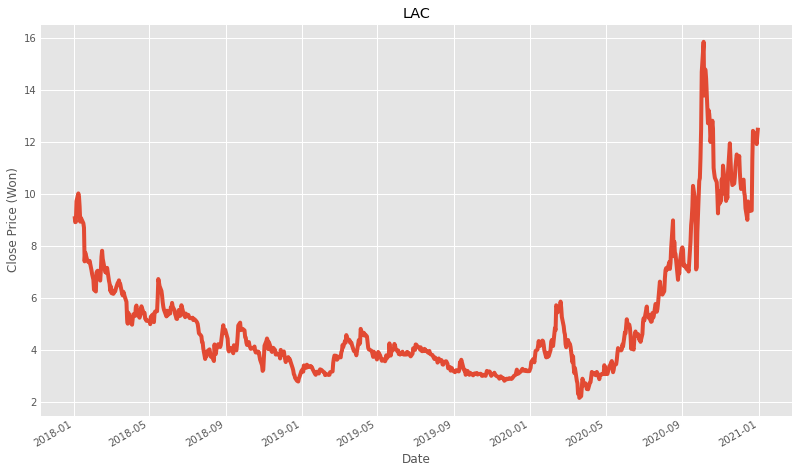

In [19]:
ax = df['y'].plot(title = ticker, figsize = (12, 8))
ax.set_ylabel('Close Price (Won)')
plt.show()

### Model Fit

In [20]:
df_prophet = Prophet(changepoint_prior_scale = 0.15, daily_seasonality = True)
df_prophet.fit(df)

### 향후 1년간의 Time Stamp 생성
- 예측을 위해선 예측하고자하는 날짜가 'ds' 칼럼에 있어야한다, `Prophet.make_future_dataframe`을 사용하여 지정된 날짜 수만큼 미래로 확장되는 적절한 데이터프레임을 얻을 수 있다
- 기본적으로 모형의 훈련에 사용된 시계열의 날짜도 포함되므로 모델이 맞는지 확인이 가능하다

In [25]:
time_stamp = 365
df_forecast = df_prophet.make_future_dataframe(periods = time_stamp, freq = 'D')
df_forecast.tail()

,ds
1116,2021-12-27
1117,2021-12-28
1118,2021-12-29
1119,2021-12-30
1120,2021-12-31


## Predict method를 이용한 주가 예측
- `predict` : 미래의 각 날짜에 "yhat"이라는 예측 값을 계산해준다, 과거 날짜를 입력하면 샘플 내 적합 결과를 제공
- 예측 개체는 예측이 포함된 "yhat"열과 구성 요소 및 불확실성 구간에 대한 열을 포함하는 새로운 데이터 프레임이다

In [28]:
df_forecast = df_prophet.predict(df_forecast)

In [29]:
df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-02,8.924283,8.158804,9.742372
1,2018-01-03,8.898340,8.064564,9.677823
2,2018-01-04,8.875315,8.102624,9.683541
3,2018-01-05,8.876803,8.086175,9.691560
4,2018-01-08,8.785130,7.994817,9.571343
...,...,...,...,...
1116,2021-12-27,24.682592,13.869037,35.216049
1117,2021-12-28,24.762088,14.156336,35.588546
1118,2021-12-29,24.819793,14.224024,35.544814
1119,2021-12-30,24.883910,14.500479,35.714245


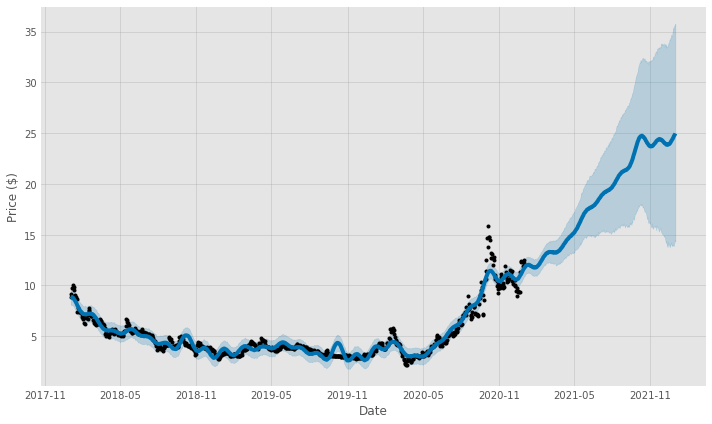

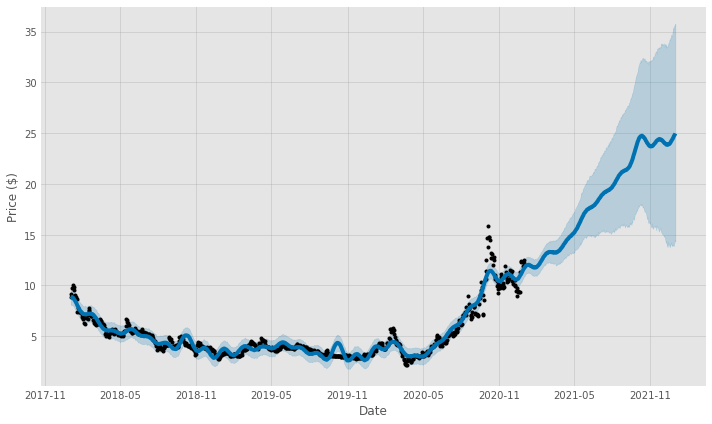

In [30]:
df_prophet.plot(df_forecast, xlabel = 'Date', ylabel = 'Price ($)')

### 예측 구성요소 확인
- 예측에 사용된 구성 요소는 `Prophet.plot_components`메서드를 사용해 확인 가능하다
- 기본적으로 시계열의 추세, 연간 계절성, 그리고 주간 계절성이 표현된다

<Figure size 1440x720 with 0 Axes>

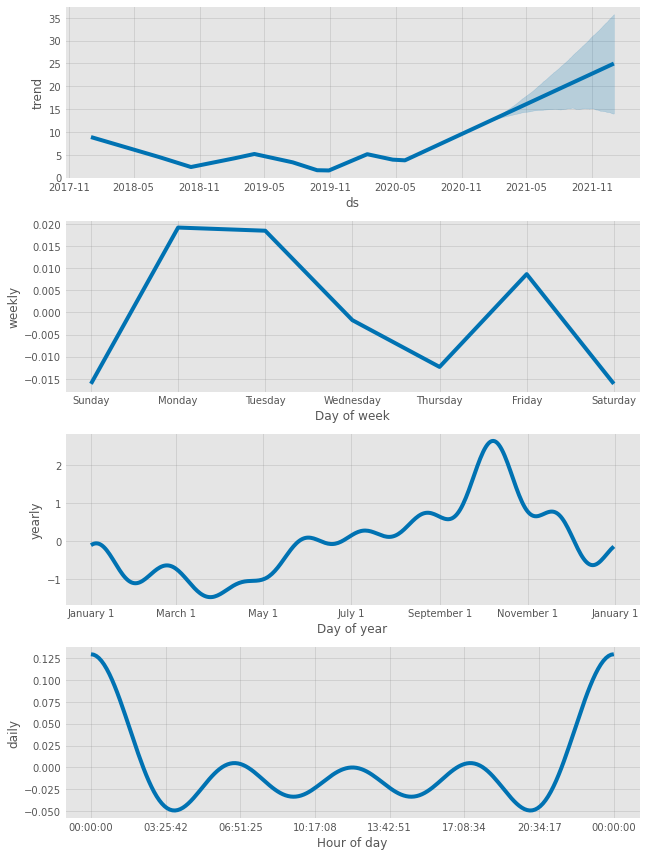

In [32]:
plt.figure(figsize = (20, 10))
fig2 = df_prophet.plot_components(df_forecast)
plt.show()

### Cross Validation
- 교차검증절차는 `